In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from colicoords.preprocess import data_to_cells, filter_binaries
from colicoords import Data, iter_subplots, CellListPlot, IterCellPlot, AutoIterCellPlot, save
import os
import mahotas as mh
from addict import Dict

In [2]:
import colicoords
colicoords.__file__

'C:\\Users\\jhs\\Programming\\cc_master\\colicoords\\__init__.py'

In [3]:
#input_dir = r'F:\_processed_big\t3ss\20191002_deltaescv_c41_eyfp-escv_repeat_03'
input_dir = r'I:\20191023_c41_eyfp-escv_escrstu_AHT25'

In [4]:
fnames = ['c41_yfp-escv_aht20', 'c41_yfp-escv_aht25', 'c41_yfp-escv_rstu_aht25_iptg0', 'c41_yfp-escv_rstu_aht25_iptg20']

In [7]:
bd = Dict()
for fname in fnames:
    print(fname)
    dd = bd[fname]
    dd.bf = np.load(os.path.join(input_dir, fname + '_BF_flat.npy'))
    dd.bin = np.load(os.path.join(input_dir, fname + '_segmented.npy'))
    dd.g100 = np.load(os.path.join(input_dir, fname + '_514_g100.npy'))
    dd.g500 = np.load(os.path.join(input_dir, fname + '_514_g500.npy'))
    dd.b_filter = filter_binaries(dd.bin, min_size=200, max_size=10000, min_minor=6, max_minor=11, min_major=10, max_major=100)
    
    data = Data()
    data.add_data(dd.b_filter, 'binary')
    data.add_data(dd.bf, 'brightfield')
    data.add_data(dd.g100, 'fluorescence', 'g100')
    data.add_data(dd.g500, 'fluorescence', 'g500')
    
    dd.cells = data_to_cells(data, remove_multiple_cells=False, verbose=False)
    
    save(fname + '_cell_raw.hdf5', dd.cells)

c41_yfp-escv_aht20
c41_yfp-escv_aht25
c41_yfp-escv_rstu_aht25_iptg0
1017 3
c41_yfp-escv_rstu_aht25_iptg20
243 1
1206 1


<IPython.core.display.Javascript object>


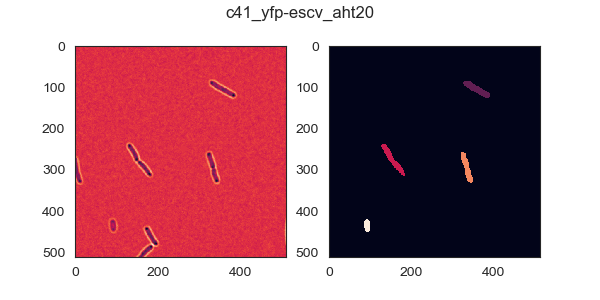

Text(0.5, 0.98, 'c41_yfp-escv_aht20')

In [9]:
fname = fnames[0]

dd = bd[fname]

fig, (ax1, ax2) = iter_subplots(1, 2, figsize=(6,3))
ax1.iter_imshow(dd.bf)
ax2.iter_imshow(dd.b_filter)
fig.display()
fig.suptitle(fname)

<IPython.core.display.Javascript object>


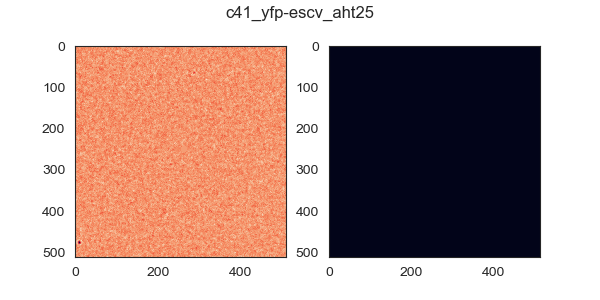

Text(0.5, 0.98, 'c41_yfp-escv_aht25')

In [10]:
fname = fnames[1]

dd = bd[fname]

fig, (ax1, ax2) = iter_subplots(1, 2, figsize=(6,3))
ax1.iter_imshow(dd.bf)
ax2.iter_imshow(dd.b_filter)
fig.display()
fig.suptitle(fname)

<IPython.core.display.Javascript object>


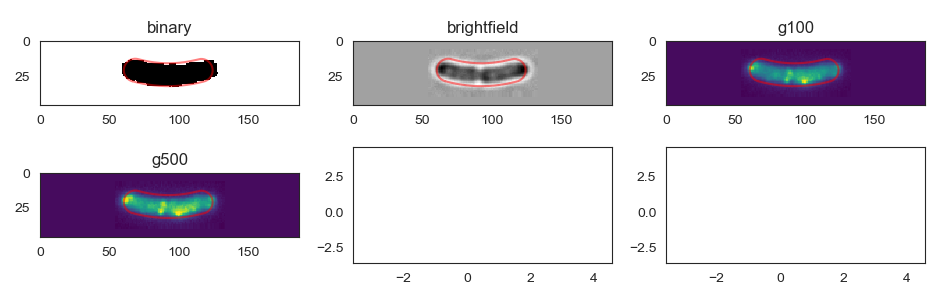

In [37]:
aicp = AutoIterCellPlot(dd.cells)
aicp.plot()

In [38]:
save(f + '_cell_raw.hdf5', dd.cells)

# C41 03

In [41]:
dd = Dict()
f = 'c41_03'

In [42]:
dd.bf = np.load(os.path.join(input_dir, f + '_BF_flat.npy'))
dd.bin = np.load(os.path.join(input_dir, f + '_segmented.npy'))
dd.g100 = np.load(os.path.join(input_dir, f + '_514_g100.npy'))
dd.g500 = np.load(os.path.join(input_dir, f + '_514_g500.npy'))

In [43]:
dd.bf.shape

(1000, 512, 512)

In [44]:
dd.b_filter = filter_binaries(dd.bin, min_size=200, max_size=10000, min_minor=6, max_minor=11, min_major=10, max_major=100)

In [45]:
data = Data()
data.add_data(dd.b_filter, 'binary')
data.add_data(dd.bf, 'brightfield')
data.add_data(dd.g100, 'fluorescence', 'g100')
data.add_data(dd.g500, 'fluorescence', 'g500')

In [46]:
dd.cells = data_to_cells(data, remove_multiple_cells=False)

Image binary 9: No cells
Image binary 19: No cells
32 1
Image binary 44: No cells
Image binary 54: No cells
Cell 1 on image binary 61: on the edge of the image
Image binary 69: No cells
Image binary 70: No cells
Image binary 71: No cells
Cell 2 on image binary 75: on the edge of the image
Image binary 79: No cells
Cell 1 on image binary 90: on the edge of the image
Cell 7 on image binary 98: on the edge of the image
Cell 4 on image binary 103: on the edge of the image
Image binary 122: No cells
Cell 4 on image binary 125: on the edge of the image
Image binary 132: No cells
Image binary 139: No cells
Image binary 145: No cells
Cell 2 on image binary 148: on the edge of the image
Cell 5 on image binary 148: on the edge of the image
Cell 4 on image binary 156: on the edge of the image
Cell 4 on image binary 158: on the edge of the image
Cell 7 on image binary 159: on the edge of the image
Image binary 163: No cells
Cell 1 on image binary 164: on the edge of the image
Cell 1 on image binar

<IPython.core.display.Javascript object>


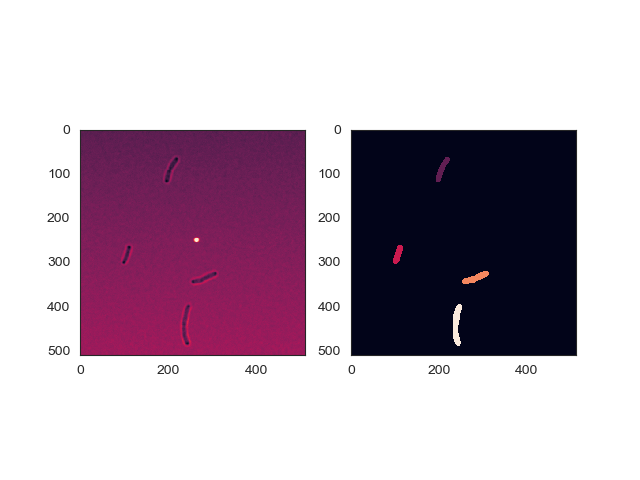

In [47]:
fig, (ax1, ax2) = iter_subplots(1, 2)
ax1.iter_imshow(dd.bf)
ax2.iter_imshow(dd.b_filter)
fig.display()

In [49]:
len(dd.cells)

3055

<IPython.core.display.Javascript object>


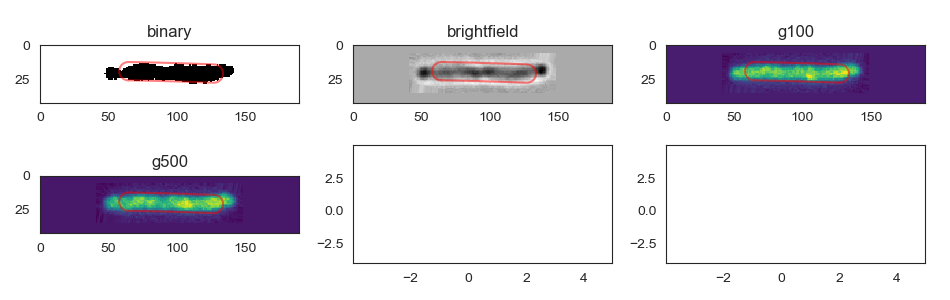

In [50]:
aicp = AutoIterCellPlot(dd.cells)
aicp.plot()

In [51]:
save(f + '_cell_raw.hdf5', dd.cells)